# Step 1: Import Libraries & Load Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# df=pd.read_csv('titanic.csv')
# df.head()

# Load Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Display first 5 rows
df.head()

# In the Titanic dataset, "Embarked" refers to the port where a passenger boarded the ship,
#  with values "C" representing Cherbourg, "Q" for Queenstown, and "S" for Southampton

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Step-2 : Data Overview and Missing Value



In [4]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In the training set:

1. 38.3% people survived
2. More number of people were actually in 3rd class
3. 50% of passengers were in between the age of 20 to 38.

Since the survival rate is 0.38, even if I decide to give a submission of all passengers being perished, I would still be having a accuracy of 62%. So accuracy cannot be considered as the only measure in saying how good the model is.

In [6]:
# Number of passengers in each class
df.groupby('pclass')['pclass'].count()

,pclass
pclass,
1,216
2,184
3,491


In [7]:
df.groupby('sex')['sex'].count()

,sex
sex,
female,314
male,577


In [8]:
# Number of passengers who survived in each class grouped by sex. Also total was found for each class grouped by sex.
df.pivot_table('survived', 'sex', 'pclass', aggfunc=np.sum, margins=True)

<ipython-input-8-e0840af949f1>:2: FutureWarning: The provided callable <function sum at 0x7c6a8523c2c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table('survived', 'sex', 'pclass', aggfunc=np.sum, margins=True)
<ipython-input-8-e0840af949f1>:2: FutureWarning: The provided callable <function sum at 0x7c6a8523c2c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table('survived', 'sex', 'pclass', aggfunc=np.sum, margins=True)
<ipython-input-8-e0840af949f1>:2: FutureWarning: The provided callable <function sum at 0x7c6a8523c2c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table(

pclass,1,2,3,All
sex,,,,
female,91,70,72,233
male,45,17,47,109
All,136,87,119,342


In [9]:
# Check missing values
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


# Step-3: Handling Missing Values

In [10]:
df['age'].median()

28.0

The median age of all the passengers travelling was 28 years.

In [11]:
# Fill missing 'age' with median
df['age'].fillna(df['age'].median(), inplace=True)
#why median ? not mean or anything? bec data can have outliers

# Fill missing 'embarked' with most frequent value
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
#for catogorical data

# Drop 'deck' column (too many missing values)
df.drop(columns=['deck'], inplace=True)

# Verify missing values
df.isnull().sum()

<ipython-input-11-994f9e652fea>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
<ipython-input-11-994f9e652fea>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


# Step-4: Removing Duplicates

In [12]:
# Check duplicates

print("Duplicates:", df.duplicated().sum())

Duplicates: 116


In [13]:
 df[df.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,28.0,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
55,1,1,male,28.0,0,0,35.5000,S,First,man,True,Southampton,yes,True
76,0,3,male,28.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,28.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,28.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
878,0,3,male,28.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,Southampton,no,True


In [14]:
# Remove duplicates
df.drop_duplicates(inplace=True)
print("Duplicates:", df.duplicated().sum())


Duplicates: 0


# Step-5: Handling Outliers

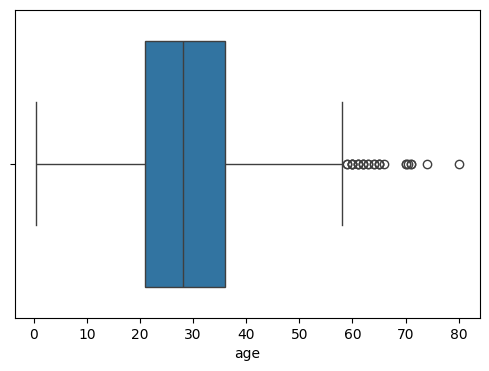

In [15]:
# Boxplot to check outliers in 'age'
plt.figure(figsize=(6,4))
sns.boxplot(x=df['age'])
plt.show()


In [16]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
print(Q1,Q3)

21.0 36.0


In [17]:
# Remove outliers using IQR method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit,upper_limit)

# Remove outliers
df = df[(df['age'] >= lower_limit) & (df['age'] < upper_limit)]
df


-1.5 58.5


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


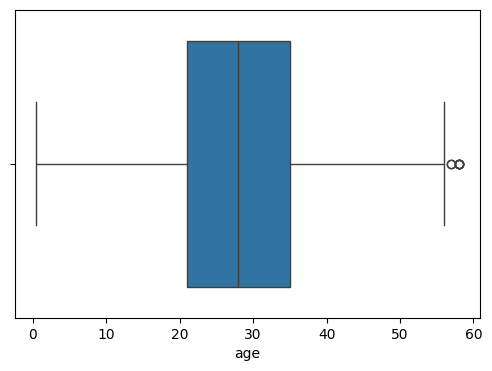

In [18]:
# Boxplot to check outliers in 'age'
plt.figure(figsize=(6,4))
sns.boxplot(x=df['age'])
plt.show()

# Step-6 : Visualization

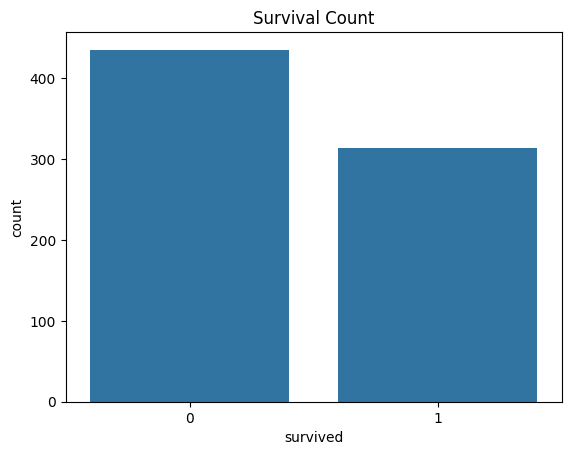

In [20]:
# Countplot of survivors
sns.countplot(x='survived', data=df)
plt.title("Survival Count")
plt.show()


In [21]:
df.groupby(['survived','sex'])['survived'].count()

survived  sex   
0         female     76
          male      359
1         female    212
          male      101
Name: survived, dtype: int64

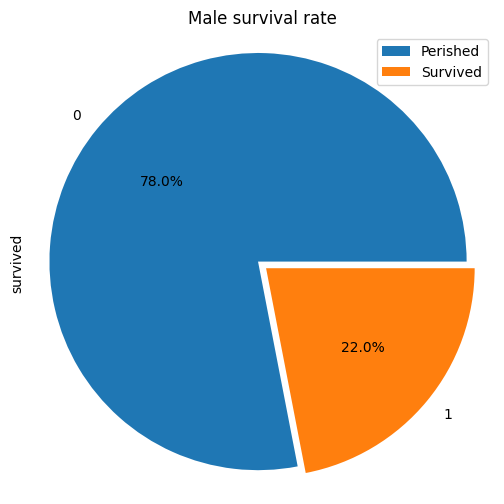

In [22]:
df[df['sex'] == 'male'].survived.groupby(df.survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Male survival rate")
plt.show()

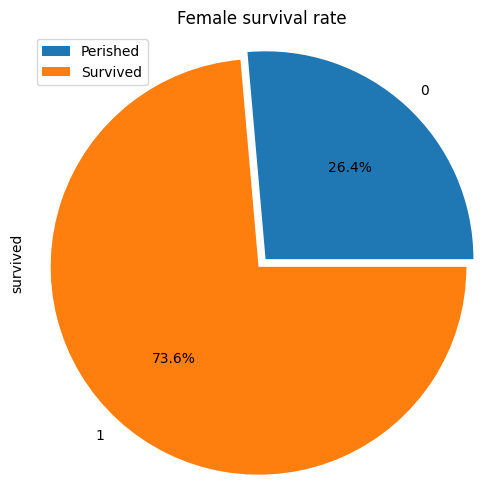

In [23]:
df[df['sex'] == 'female'].survived.groupby(df.survived).count().plot(kind='pie',autopct='%1.1f%%',figsize=(6, 6),explode=[0,0.05])
plt.axis('equal')
plt.title("Female survival rate")
plt.legend(["Perished","Survived"])
plt.show()

The above 2 plots says the females were given more priority than male in the survival process. That too there is a significant difference between the two.

So now if we choose just Sex as the only feature and say all females survived and all men perished, then we would end up with an accuracy of 78.67%

In [24]:
pd.crosstab([df.sex, df.survived], [df.sibsp, df.pclass], margins=True)

sibsp              0            1          2         3          4  5  8  All
pclass             1   2    3   1   2   3  1  2   3  1  2   3   3  3  3     
sex    survived                                                             
female 0           1   3   32   2   3  21  0  0   3  0  0   5   4  1  1   76
       1          46  38   39  36  24  14  3  3   3  2  1   1   2  0  0  212
male   0          47  49  165  14  18  33  1  4   7  1  0   4  11  4  1  359
       1          26   8   33  14   7   9  1  1   1  0  0   0   1  0  0  101
All              120  98  269  66  52  77  5  8  14  3  1  10  18  5  2  748

The above crosstab indicates 2 things:

1. Most of the passerenges didn'y had siblings onboard and the majority had atmost 1 sibling onboard

2. Not much of priority was given to the passengers who had sibelings onboard in the rescue operation

In [25]:
pd.crosstab([df.sex, df.survived], [df.parch, df.pclass], margins=True)

parch              0             1           2          3     4  5  6  All
pclass             1    2    3   1   2   3   1   2   3  2  3  3  3  3     
sex    survived                                                           
female 0           1    5   34   0   1  11   2   0  15  0  1  2  3  1   76
       1          59   36   38  17  17  11  11  11   8  2  1  0  1  0  212
male   0          52   62  188   8   6  22   3   3  12  0  1  1  1  0  359
       1          33    7   34   3   7   7   5   2   3  0  0  0  0  0  101
All              145  110  294  28  31  51  21  16  38  2  3  3  5  1  748

The above crosstab indicates 2 things:

1. Most of the passerenges didn't had parents onboard and the majority had atmost 1 parent onboard
2. Not much of priority was given to the passengers who had parents onboard in the rescue operation

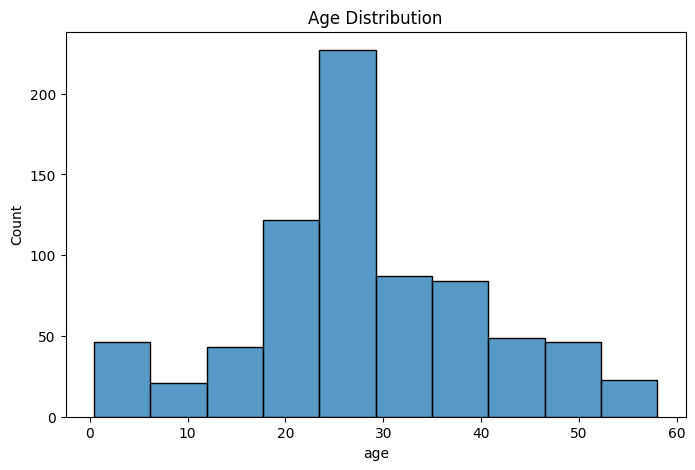

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=10)
plt.title("Age Distribution")
plt.show()



Description: These histograms illustrate the distribution of passengers’ ages. They help us understand the age demographics on board.

Conclusion: A significant portion of the passengers were young adults, with fewer children and elderly individuals. This suggests that the Titanic had a diverse age range, but most travelers were in their 20s and 30s.

In [29]:
# Create a new column 'family_size'
df['Family_size'] = df['sibsp'] + df['parch'] + 1

# Create a new column 'is_child' (1 if age < 16, else 0)
df['is_child'] = np.where(df['age'] < 16, 1, 0)




<ipython-input-29-525820c3247c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Family_size'] = df['sibsp'] + df['parch'] + 1
<ipython-input-29-525820c3247c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_child'] = np.where(df['age'] < 16, 1, 0)


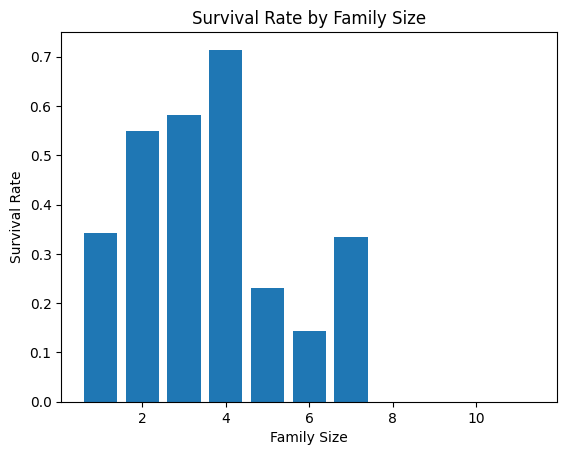

In [30]:
mean_survival = df.groupby(df['Family_size'])['survived'].mean()

# Plot using Matplotlib
plt.bar(mean_survival.index, mean_survival.values)


plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Family Size")

plt.show()

This graph illustrates the relationship between family size (combining siblings/spouses and parents/children aboard) and survival rate.

Conclusion:
Passengers with small to medium family sizes (2-4 members) had a higher survival rate compared to those traveling alone or with very large families.

Large families (5+ members) had the lowest survival rate, possibly because coordinating a large group during an emergency was challenging.

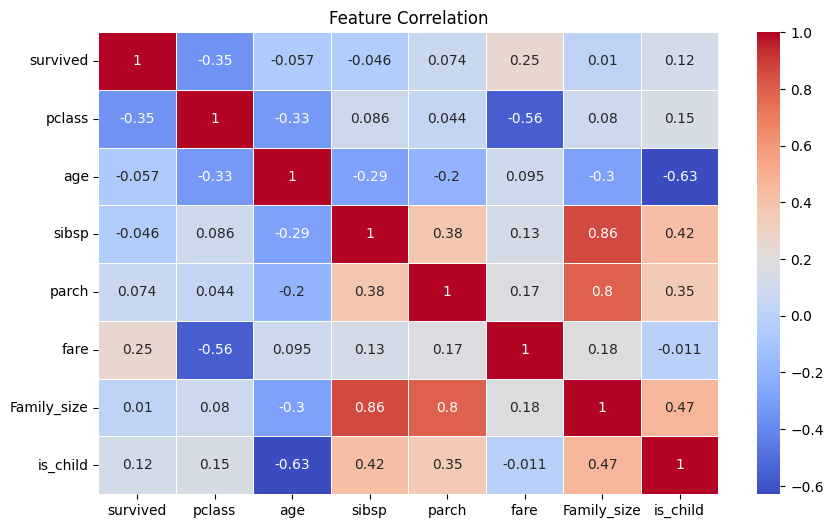

In [31]:

numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation")
plt.show()

Fare and Passenger Class are strongly correlated (negative correlation) because higher-class tickets had higher fares.

Fare and Survival show a moderate positive correlation, indicating that higher fare-paying passengers had better survival rates, supporting the idea that first-class passengers were more likely to survive.

Age and SibSp/Parch show a weak correlation, suggesting that family size had little impact on age distribution.

Survival and SibSp/Parch have a weak correlation, meaning family size alone was not a strong determinant of survival but could have had some influence

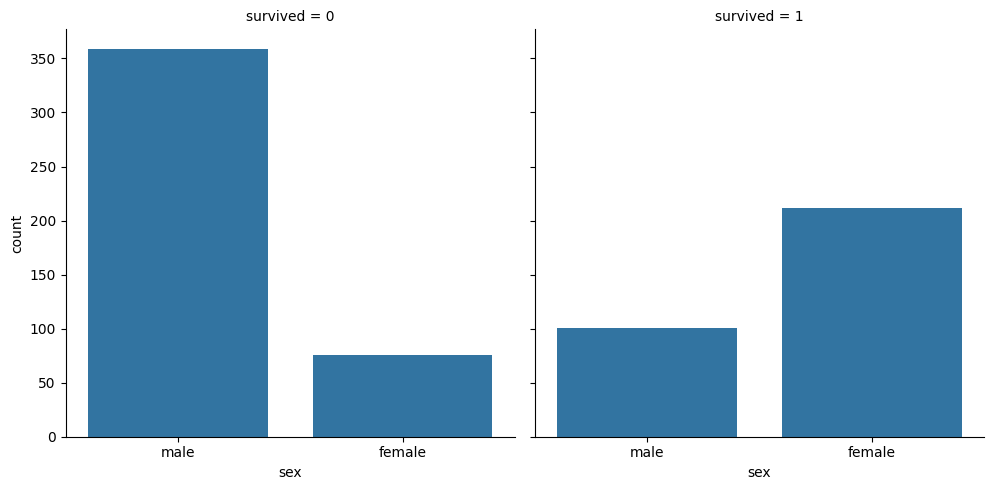

In [32]:
sns.catplot(x='sex', col='survived', kind='count', data=df);

<Axes: xlabel='pclass', ylabel='survived'>

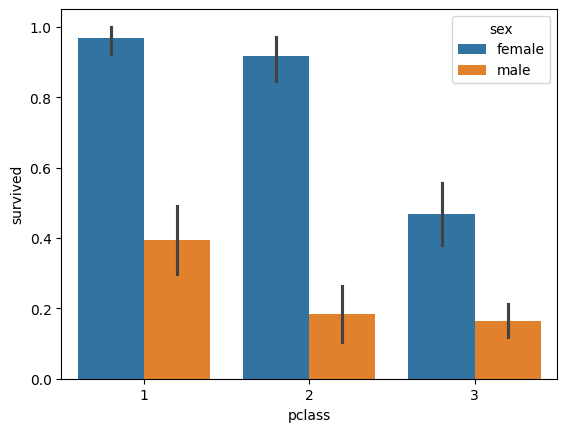

In [33]:
sns.barplot(x='pclass', y='survived', hue='sex', data=df)

## Conclusion:

The analysis of the Titanic dataset reveals several key patterns about survival. It shows that certain factors significantly influenced a passenger's chances of survival. People who paid higher fares had a better chance of survival, while those with larger families faced more difficulties. Age also played a role, with younger passengers generally having better survival rates. Additionally, gender was a crucial factor, as women had a much higher likelihood of survival compared to men.

Through this study, we see how different aspects, such as financial status, family connections, and demographic details, impacted survival. This highlights the importance of data analysis in understanding real-world events and uncovering meaningful insights.